First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset Summary:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399

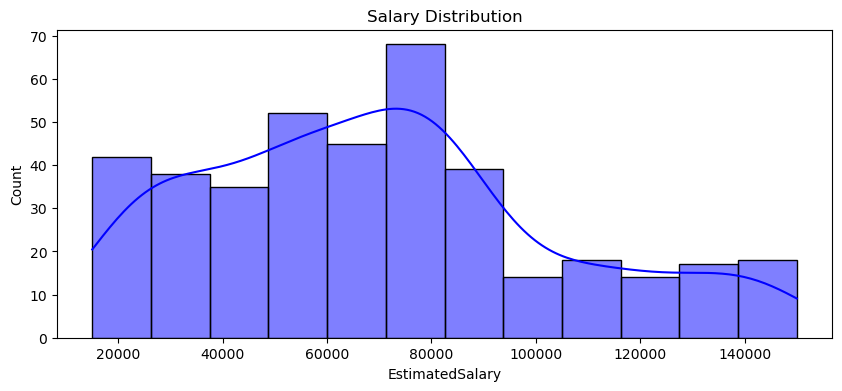

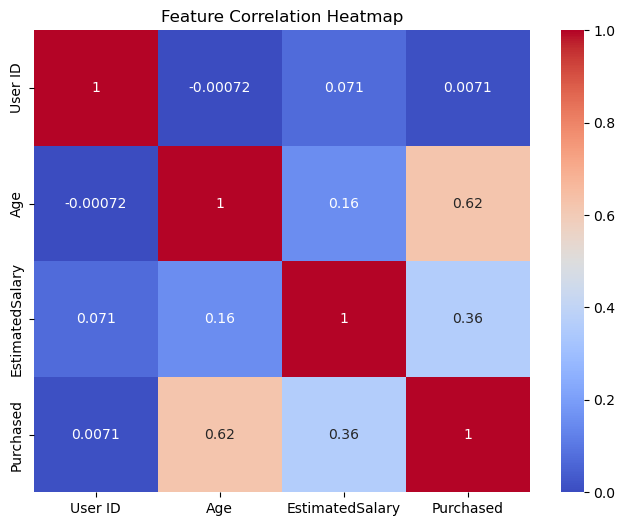


Accuracy Score: 0.9375

Precision Score: 0.9259259259259259

F1 Score: 0.9090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



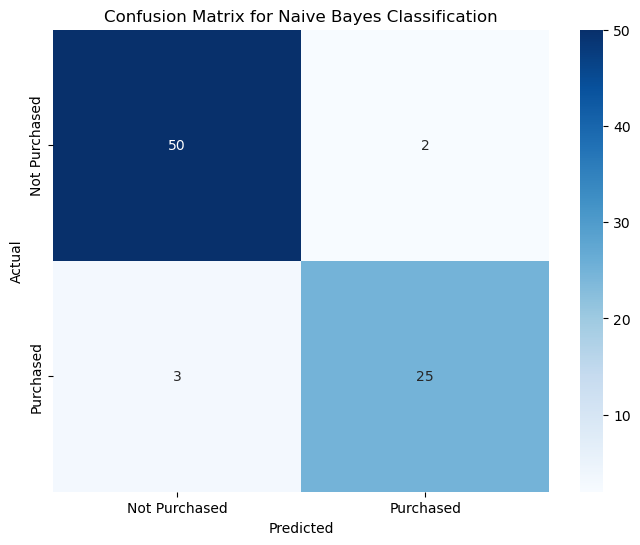

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv("/home/primes/Documents/COOPERATIVE UNIVERSITY OF KENYA/4.1/MACHINE-LEARNING/Social_Network_Ads.csv")

# Initial inspection of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())
print("\nDataset Summary:")
print(dataset.describe())
print("\nDataset Info:")
print(dataset.info())

# Visualize distributions of features
plt.figure(figsize=(10, 4))
plt.title('Salary Distribution')
sns.histplot(dataset['EstimatedSalary'], kde=True, color='blue')
plt.show()

# Correlation heatmap to inspect relationships between numerical features only
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Data Preprocessing
# Dropping irrelevant column 'User ID' as it doesn’t affect the classification
dataset.drop('User ID', axis=1, inplace=True)

# Encoding categorical features (Gender)
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

# Defining feature matrix (X) and target variable (y)
X = dataset[['Age', 'EstimatedSalary']].values  # Selecting relevant numerical features
y = dataset['Purchased'].values  # Target column for classification

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features for improved performance (essential for distance-based classifiers like Naive Bayes)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and fit the Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the target variable on the test set
y_pred = classifier.predict(X_test)

# Evaluation Metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nPrecision Score:", precision_score(y_test, y_pred))
print("\nF1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classification')
plt.show()
